# Machine Learning Practice

# Exploration Data Analysis + Machine Learning 

## Data set: Auto-MPG

This exercise was based on the proposed exercise available in https://www.kaggle.com/devanshbesain/exploration-and-analysis-auto-mpg

However, some changes were made, since part of the instructions in the final part did not worked  (Python 3)

 Data-set: auto-mpg3.csv

---------------------------------------------
[Original text from link above]
Python notebook created for exploration and analysis of the Auto- MPG data-set from UCI Machine Learning Library.

The data-set is fairly standard on kaggle but can be accessed separately from the UCI Machine Learning Repository along with many other interesting data-sets. Check http://archive.ics.uci.edu/ml/index.php for more.

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. 

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the "../input/" directory on kaggle.
#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [2]:
'''==================================================

1) DATA IMPORTING

=================================================='''
data = pd.read_csv('auto-mpg3.csv')
print(data.head())
print(data.index)
print(data.columns)
print(data.shape)

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
RangeIndex(start=0, stop=398, step=1)
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')
(398, 9)


In [34]:
# Improving the label == >assigning "Car name" as label 
'''
index_col : int, str, sequence of int / str, or False, default None
Column(s) to use as the row labels of the DataFrame, either given as
string name or column index. 
If a sequence of int / str is given, a MultiIndex is used.

Note: index_col=False can be used to force pandas to not use the first column as the index,
e.g. when you have a malformed file with delimiters at the end of each line.
'''

data = pd.read_csv('auto-mpg3.csv',index_col='car name')
print(data.head())
print(data.index)
print(data.columns)

                            mpg  cylinders  displacement horsepower  weight  \
car name                                                                      
chevrolet chevelle malibu  18.0          8         307.0        130    3504   
buick skylark 320          15.0          8         350.0        165    3693   
plymouth satellite         18.0          8         318.0        150    3436   
amc rebel sst              16.0          8         304.0        150    3433   
ford torino                17.0          8         302.0        140    3449   

                           acceleration  model year  origin  
car name                                                     
chevrolet chevelle malibu          12.0          70       1  
buick skylark 320                  11.5          70       1  
plymouth satellite                 11.0          70       1  
amc rebel sst                      12.0          70       1  
ford torino                        10.5          70       1  
Index(['chev

In [ ]:
'''
So there it is..lots of numbers. 
We can see that the dataset has the following columns (with their type):

mpg: continuous
cylinders: multi-valued discrete
displacement: continuous
horsepower: continuous
weight: continuous
acceleration: continuous
model year: multi-valued discrete
origin: multi-valued discrete
car name: string (unique for each instance)
'''

In [35]:
data.shape

(398, 8)

In [11]:
''' ==================================================
 
 2) DATA PREP 

================================================='''


' ==================================================\n \n 2) DATA PREP \n\n================================================='

In [36]:
# check if ther eis any null or NaN value:

data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
dtype: bool

In [37]:
# See that the the other command below is not practical..
data.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,False,False,False,False,False,False,False,False
buick skylark 320,False,False,False,False,False,False,False,False
plymouth satellite,False,False,False,False,False,False,False,False
amc rebel sst,False,False,False,False,False,False,False,False
ford torino,False,False,False,False,False,False,False,False
ford galaxie 500,False,False,False,False,False,False,False,False
chevrolet impala,False,False,False,False,False,False,False,False
plymouth fury iii,False,False,False,False,False,False,False,False
pontiac catalina,False,False,False,False,False,False,False,False


In [38]:
#Nothing seems to be missing.


# LEt's check types:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [ ]:
# But then, why is horsepower an object and not a float?
# The values we saw above were clearly numbers..
# We will convert later the column using astype()

#But before, let's look at the unique elements of horsepower to look for discrepancies 

In [39]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [40]:
# When we print out all the unique values in horsepower,
# we find that there is '?' (output,3rd line) which was used as a placeholder  for missing values.
# Let's  remove these entries.

data = data[data.horsepower !='?']  #remove lines containing  '?' in horsepower 

#Check
print('?' in data.horsepower)

False


In [41]:
#check new shape
data.shape

(392, 8)

In [16]:
# So the number of the samples decreased from 398 to 392.

# about dtypes
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [42]:
data.horsepower = data.horsepower.astype('float')

data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [43]:
#Now everything looks in order so let's continue and explore the dataset


''' ==================================================

3. DATA DESCRIPTION AND Data EXPLORATION
(and more data prep...)

=================================================='''


data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [44]:
## Step 1: loog at mpg

data.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [ ]:
#So the minimum value is 9 and maximum is 46,
#  the average is 23.44 with a std. deviation of 7.8


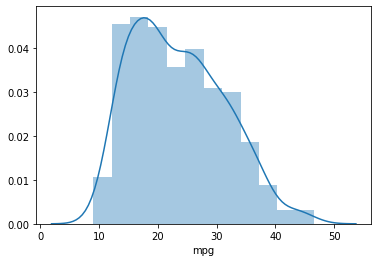

In [45]:
sns.distplot(data['mpg'])


In [46]:
# Obviously, not a normal curve...

# Using our seaborn tool we can look at mpg data  Skewness and Kurtosis:
print("Skewness: %f" % data['mpg'].skew())
print("Kurtosis: %f" % data['mpg'].kurt())


Skewness: 0.457092
Kurtosis: -0.515993


In [47]:
#Lets visualize some relationships between these data points, 
# but before we do, we need to scale them to same the same range of [0,1]
# In order to do so, lets define a function scale: 

def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [31]:

data_scale = data.copy()  # until now, just make it  equal to data

#check:
data_scale[0:10]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,1
chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,1
plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,1
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1


In [48]:
# Transform information inside data_scale:

data_scale ['displacement'] = scale(data_scale['displacement'])
data_scale['horsepower'] = scale(data_scale['horsepower'])
data_scale ['acceleration'] = scale(data_scale['acceleration'])
data_scale ['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])


In [49]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1
buick skylark 320,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1
plymouth satellite,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1
amc rebel sst,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1
ford torino,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1


In [50]:
#All our data is now scaled to the same range of [0,1].
#This will help us visualize data better. 
# We used a copy of the original data-set for this as we will use
# the data-set later when we build regression models.


# Let's change the following:

data['Country_code']       = data.origin.replace([1,2,3],['USA','Europe','Japan'])

data_scale['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])

In [63]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code
car name,,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,USA
buick skylark 320,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,USA
plymouth satellite,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,USA
amc rebel sst,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,USA
ford torino,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,USA


In [65]:
#check
print(data_scale['Country_code'].shape)
data_scale['Country_code']


(392,)


car name
chevrolet chevelle malibu       USA
buick skylark 320               USA
plymouth satellite              USA
amc rebel sst                   USA
ford torino                     USA
                              ...  
ford mustang gl                 USA
vw pickup                    Europe
dodge rampage                   USA
ford ranger                     USA
chevy s-10                      USA
Name: Country_code, Length: 392, dtype: object

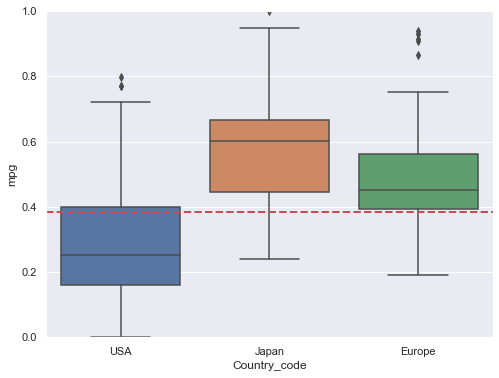

In [330]:
#Lets look at MPG's relation to categories




# Plot: mpg X country_code
var   = 'Country_code'
data_plt = pd.concat(   [ data_scale['mpg'] , data_scale[var] ] , axis=1)  # Axis is MANDATORY for fucntion to work

f,ax= plt.subplots(figsize=(8, 6))
fig=sns.boxplot (  x=var,   y="mpg" , data=data_plt )
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

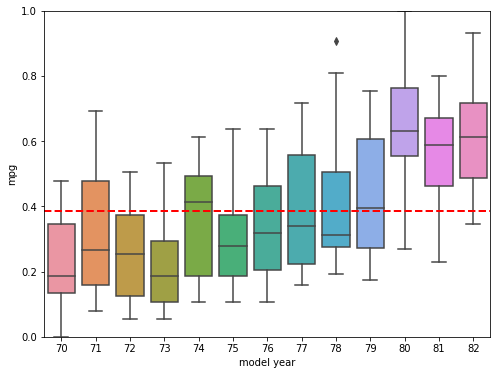

In [52]:
# The red line marks the average of the set. 
# From the above plot we can observe:
# Majority of the cars from USA (almost 75%) have MPG below global average.
# Majority of the cars from Japan and Europe have MPG above global average.


#Let's look at the year wise distribution of MPG
# Plot: mpg X model year
var    = 'model year'
data_plt = pd.concat(   [  data_scale['mpg'],data_scale[var]  ], axis=1   )
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

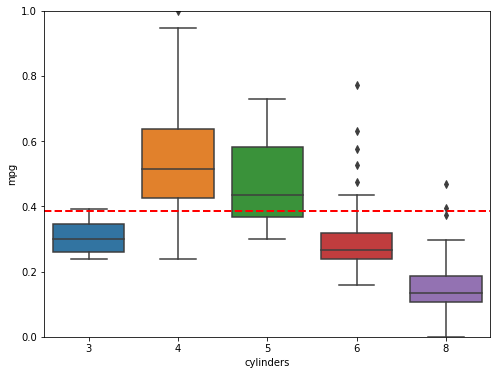

In [54]:

#And MPG distribution for cylinders

var = 'cylinders'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

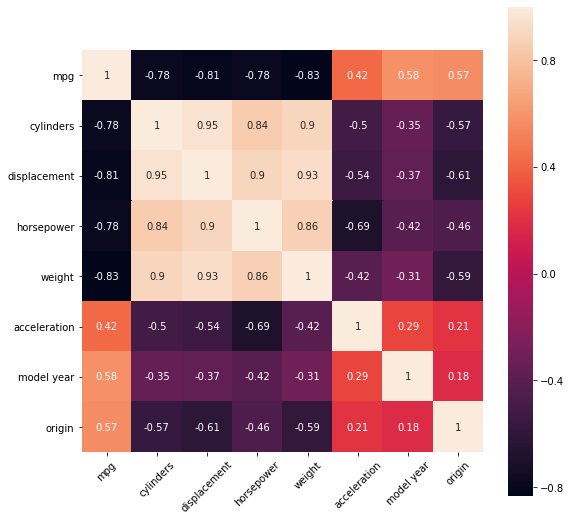

In [59]:
# Now let's check the correlation matrix of the variables:

corrmat = data.corr()
f, ax = plt.subplots(figsize=(9, 9))

chart=sns.heatmap(corrmat, square=True, annot=True); #annot=True---> to show data values inside each square
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

#if necessary, run the code below to adjust plot top and bottom visualization:
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

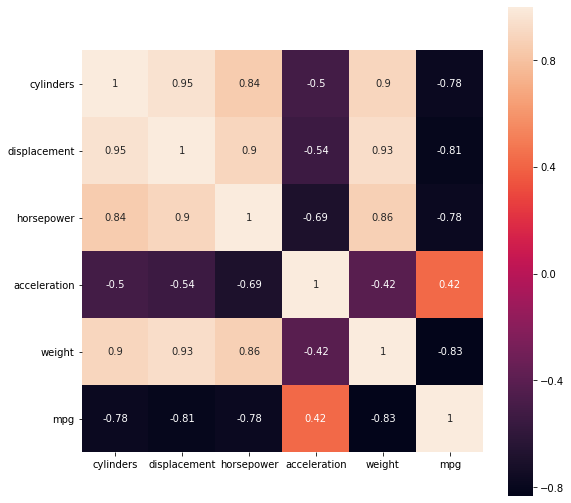

In [56]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','mpg']

corrmat = data[factors].corr()
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corrmat, square=True,annot=True);

#if necessary, run the code below to adjust plot top and bottom visualization:
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

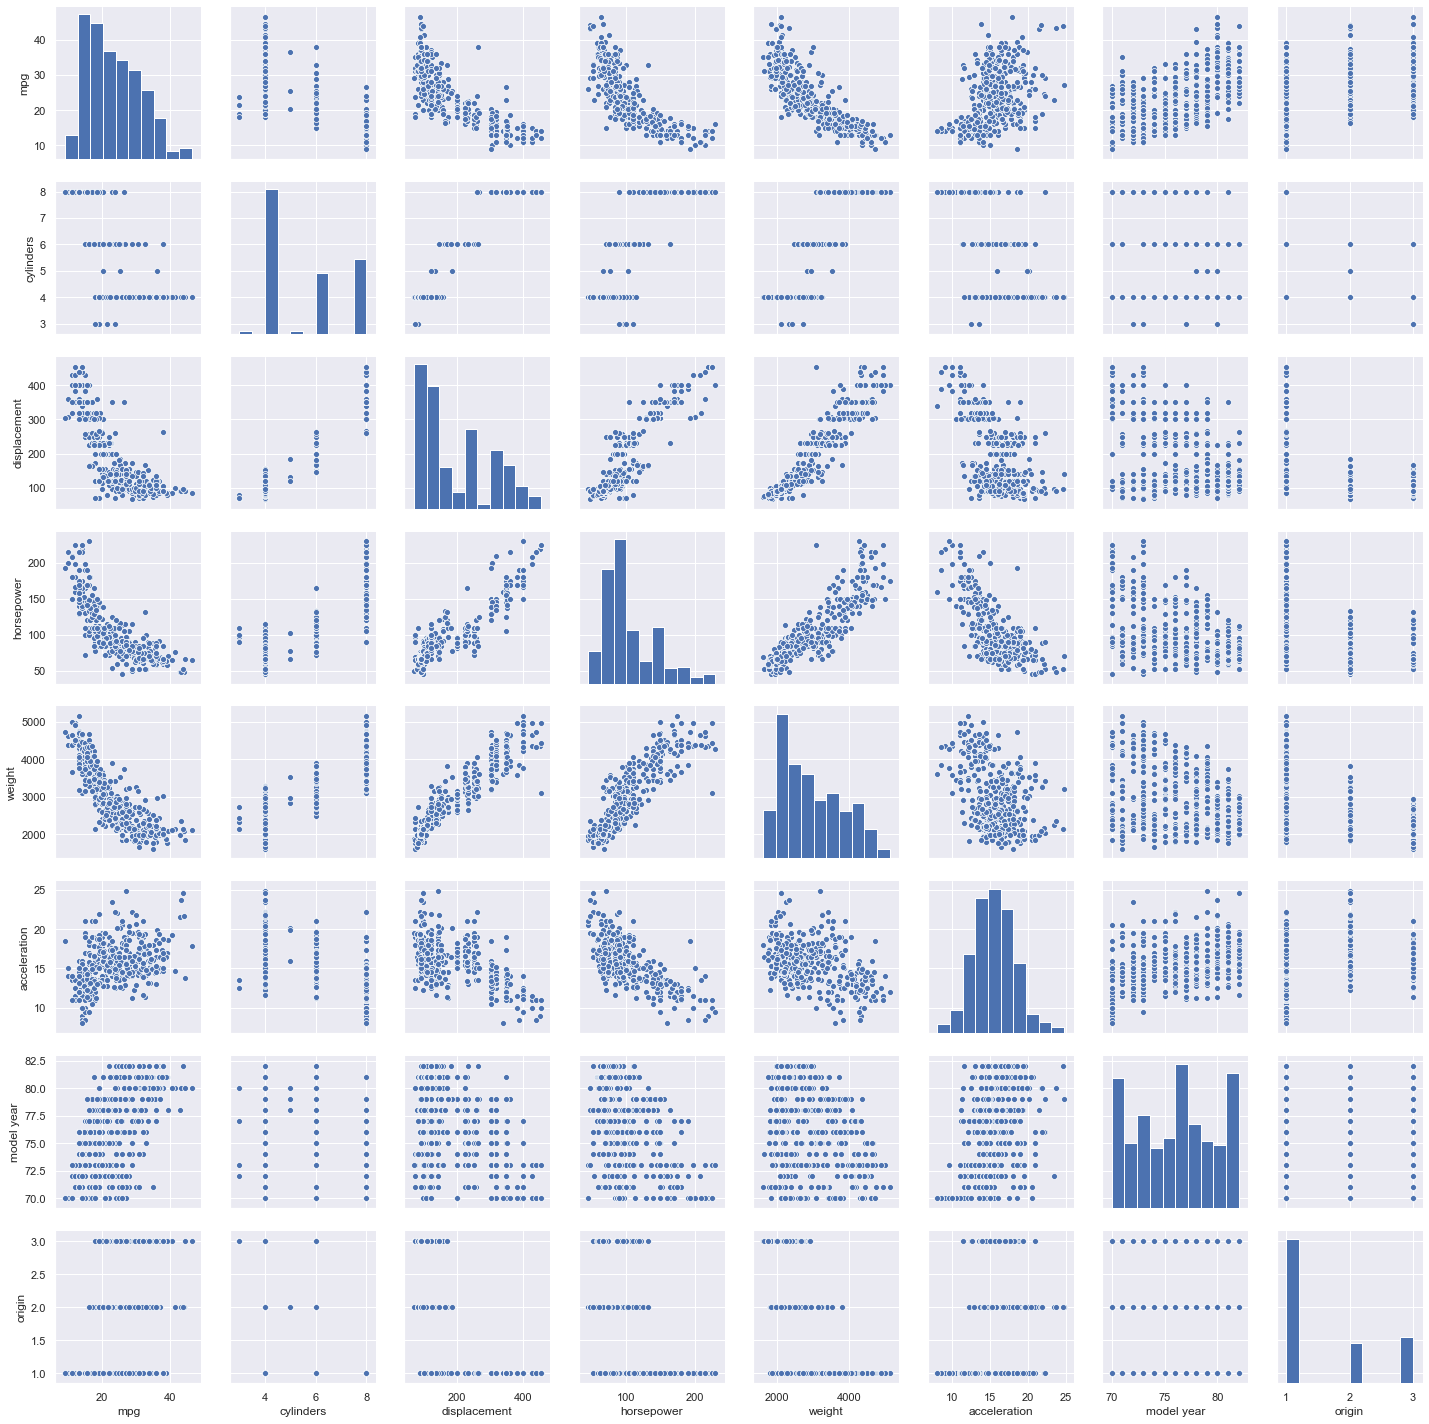

"\nObs:  hue : string (variable name), optional\nVariable in data to map plot aspects to different colors.\n\nOBS: even if the instruction os ok, in Jupyter, the hue argument did not worked,\nso there is no color distinction for 'Country code'.\n"

In [60]:
### Scatterplot

sns.set()
sns.pairplot(data) #, size = 5.0, hue ='Country_code') ## parameters elimnated because the plot could not be generated.. 

plt.show()
'''
Obs:  hue : string (variable name), optional
Variable in data to map plot aspects to different colors.

OBS: even if the instruction os ok, in Jupyter, the hue argument did not worked,
so there is no color distinction for 'Country code'.
'''

LinAlgError: singular matrix

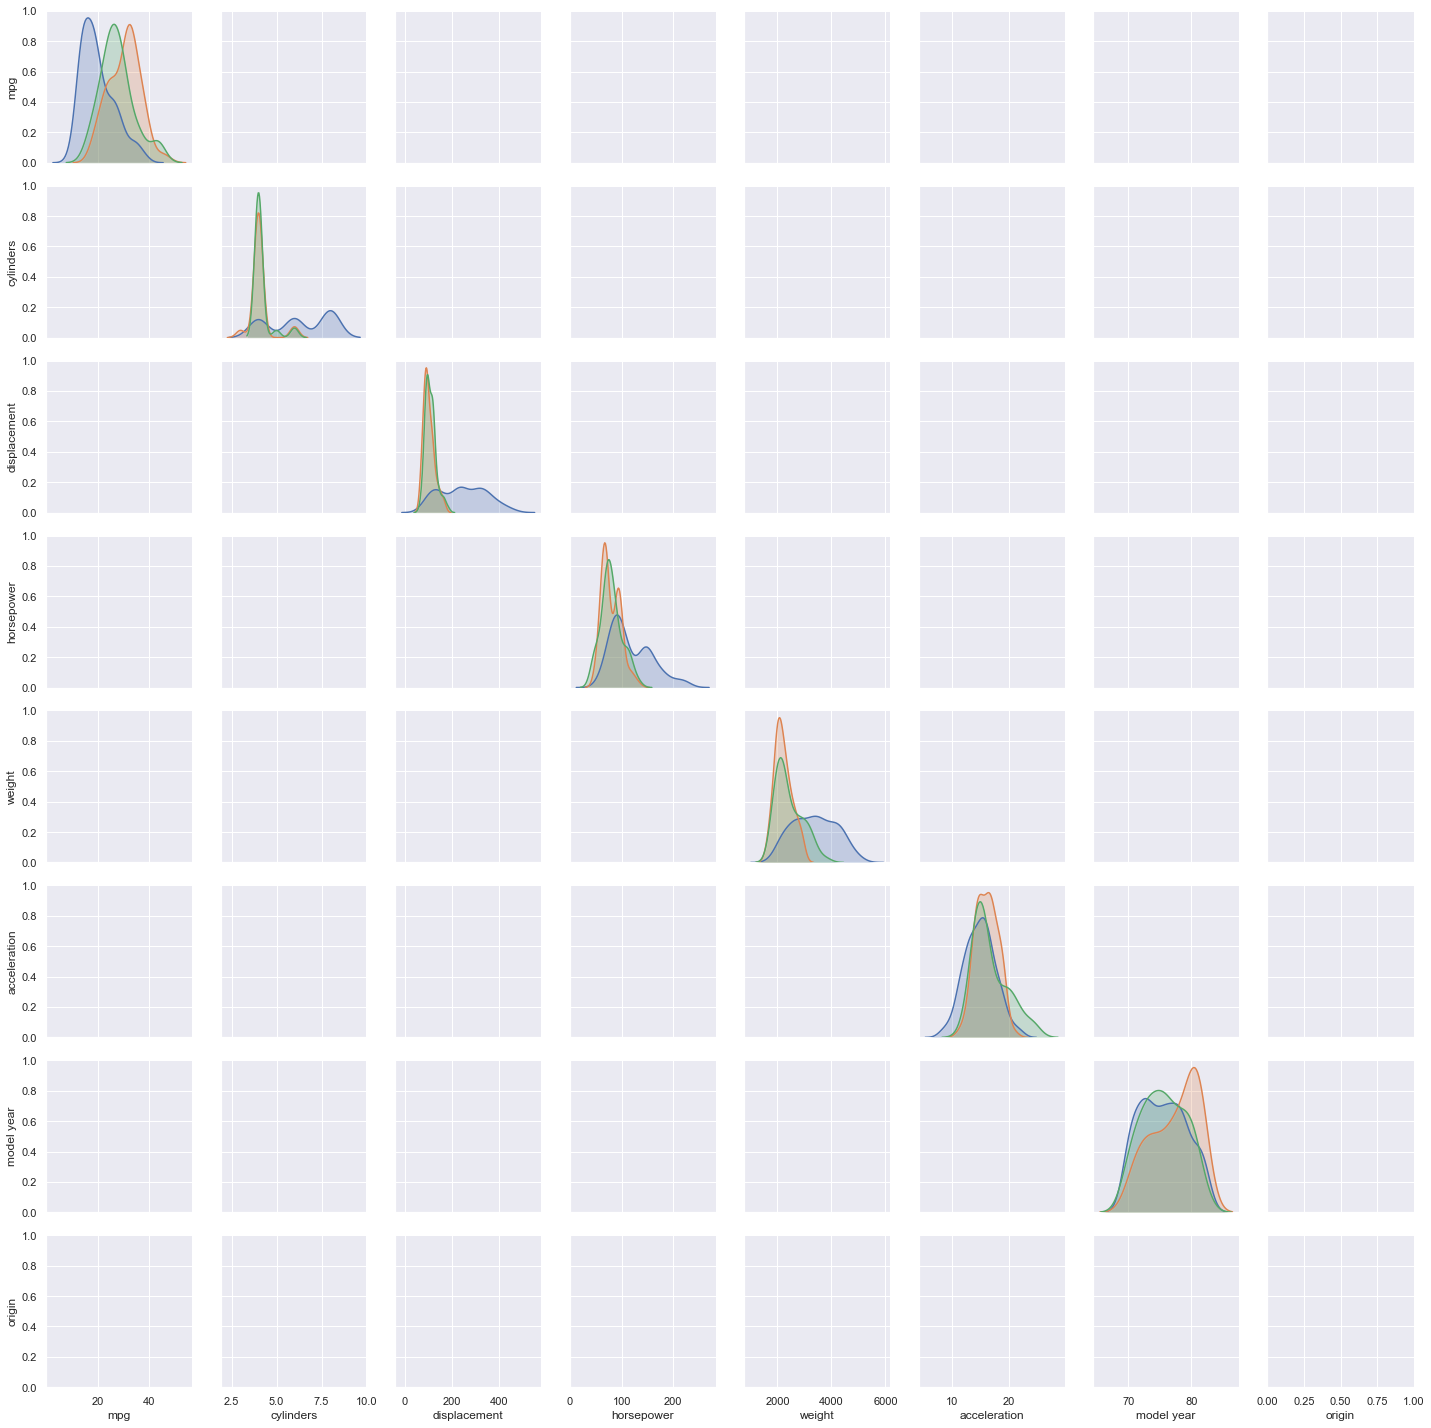

In [103]:
#Trying again..but it also not worked
sns.set()
sns.pairplot(data,hue ='Country_code') 
plt.show()

In [ ]:
# The code above was insufficient to generate the plot (due to some internal error)
# but let's move on...


# Let's include the Company name column

'''
So far, we have seen the data to get a feel for it, 
we saw the spread of the desired variable MPG along the various discrete variables,
namely, Origin, Year of Manufacturing or Model and Cylinders.

Now lets extract an additional discrete variable company name 
and add it to this data. 
We will use regular expressions and str.extract() function of pandas data-frame
to make this new column'''

In [68]:
#Check the labels (index) of the data:
print(data.index)

print(data.columns)

Index(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
       'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       ...
       'chrysler lebaron medallion', 'ford granada l', 'toyota celica gt',
       'dodge charger 2.2', 'chevrolet camaro', 'ford mustang gl', 'vw pickup',
       'dodge rampage', 'ford ranger', 'chevy s-10'],
      dtype='object', name='car name', length=392)
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'Country_code'],
      dtype='object')


In [72]:
#As we can see the --index-- of the 'data' dataframe contains model name along with the company name.
# We want a column with just the company name

#Now lets use regular expressions to quickly extract the only the Company names.
#As we can see the index is in format 
#'COMPANY_NAME  -  SPACE  -  MODEL  - SPACE  - VARIANT' 
#and so regular expressions will make it an easy task (at least, the're supposed to).

data [data.index.str.contains('subaru') ].index.str.replace('(.*)', 'subaru dl')
data [data.index.str.contains('amc') ].index.str.replace('(.*)', 'Amc')

#check
data.index[140:180]


Index(['volkswagen dasher', 'opel manta', 'toyota corona', 'datsun 710',
       'dodge colt', 'fiat 128', 'fiat 124 tc', 'honda civic', 'subaru',
       'fiat x1.9', 'plymouth valiant custom', 'chevrolet nova',
       'mercury monarch', 'ford maverick', 'pontiac catalina',
       'chevrolet bel air', 'plymouth grand fury', 'ford ltd', 'buick century',
       'chevroelt chevelle malibu', 'amc matador', 'plymouth fury',
       'buick skyhawk', 'chevrolet monza 2+2', 'ford mustang ii',
       'toyota corolla', 'ford pinto', 'amc gremlin', 'pontiac astro',
       'toyota corona', 'volkswagen dasher', 'datsun 710', 'ford pinto',
       'volkswagen rabbit', 'amc pacer', 'audi 100ls', 'peugeot 504',
       'volvo 244dl', 'saab 99le', 'honda civic cvcc'],
      dtype='object', name='car name')

In [395]:
# the above command, as proposed, change the label of the index, but not the  column  'Company Name' 

#check
data.index[140:150]


pandas.core.indexes.base.Index

In [441]:
# ok, it changed the name of the index label  of Subaru cars only.

# Let's include the values on the new column "Company_Name: :

data['Company_Name'] = data.index.str.extract('(^.*?)\s')

#check:
data['Company_Name'] 

car name
chevrolet chevelle malibu    NaN
buick skylark 320            NaN
plymouth satellite           NaN
amc rebel sst                NaN
ford torino                  NaN
                            ... 
ford mustang gl              NaN
vw pickup                    NaN
dodge rampage                NaN
ford ranger                  NaN
chevy s-10                   NaN
Name: Company_Name, Length: 398, dtype: object

In [75]:
#last instruction did not worked as supposed, so let's take another approach:

df_index=pd.DataFrame(data.index) #new auxiliary dataframe created.
print(type(df_index))

df_index.shape

<class 'pandas.core.frame.DataFrame'>


(392, 1)

In [76]:
#data['Company_Name'] = df_index.str.apply(lambda x: x.str.split().str[0])
#data['Company_Name'] = pd.df_index({c: df_index[c].str.split(n=1).str[0] for c in df_index})

data['Company_Name'] = data.index.str.split(' ').str[0] 

#check:
data['Company_Name'] 

car name
chevrolet chevelle malibu    chevrolet
buick skylark 320                buick
plymouth satellite            plymouth
amc rebel sst                      amc
ford torino                       ford
                               ...    
ford mustang gl                   ford
vw pickup                           vw
dodge rampage                    dodge
ford ranger                       ford
chevy s-10                       chevy
Name: Company_Name, Length: 392, dtype: object

In [77]:
data['Company_Name'].isnull().any()


False

False

In [80]:
# apparently it correctly copied the index labels to the new column "company_name"
# and there is no 'NaN' value left.


# We can also see that some companies are named differently and also some spelling mistakes,
#let's correct these:
data['Company_Name'] = data['Company_Name'].replace(['volkswagen','vokswagen','vw'],'VW')
data['Company_Name'] = data['Company_Name'].replace('maxda','mazda')
data['Company_Name'] = data['Company_Name'].replace('toyouta','toyota')
data['Company_Name'] = data['Company_Name'].replace('mercedes','mercedes-benz')
data['Company_Name'] = data['Company_Name'].replace('nissan','datsun')
data['Company_Name'] = data['Company_Name'].replace('capri','ford')
data['Company_Name'] = data['Company_Name'].replace(['chevroelt','chevy'],'chevrolet')

#check
data['Company_Name'][120:160]

car name
dodge dart custom                         dodge
saab 99le                                  saab
toyota mark ii                           toyota
oldsmobile omega                     oldsmobile
plymouth duster                        plymouth
amc hornet                                  amc
chevrolet nova                        chevrolet
datsun b210                              datsun
ford pinto                                 ford
toyota corolla 1200                      toyota
chevrolet vega                        chevrolet
chevrolet chevelle malibu classic     chevrolet
amc matador                                 amc
plymouth satellite sebring             plymouth
ford gran torino                           ford
buick century luxus (sw)                  buick
dodge coronet custom (sw)                 dodge
ford gran torino (sw)                      ford
amc matador (sw)                            amc
audi fox                                   audi
volkswagen dasher              

In [85]:
# Now it worked.

data['Company_Name'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'VW', 'peugeot', 'audi', 'saab',
       'bmw', 'hi', 'mercury', 'opel', 'fiat', 'oldsmobile', 'chrysler',
       'mazda', 'volvo', 'renault', 'honda', 'subaru', 'mercedes-benz',
       'cadillac', 'triumph'], dtype=object)

In [90]:
# Check any null or NaN values
data.Company_Name.isnull().any()

False

In [86]:
# If necessary, checg mispelling words: 
print('capri' in data['Company_Name'])
print('maxda' in data['Company_Name'])
print('toyouta' in data['Company_Name'])
print('nissan' in data['Company_Name'])
print('chevroelt' in data['Company_Name'])
print('chevy' in data['Company_Name'])
print('mercedes' in data['Company_Name'])
print('volkswagen' in data['Company_Name'])
print('volkswagen dasher' in data['Company_Name'])
print('pontiac' in data['Company_Name'])

False
False
False
False
False
False
False
False
True
False


In [88]:
#
print(data_scale['mpg'].shape)

print(data[var].shape)

(392,)
(392,)


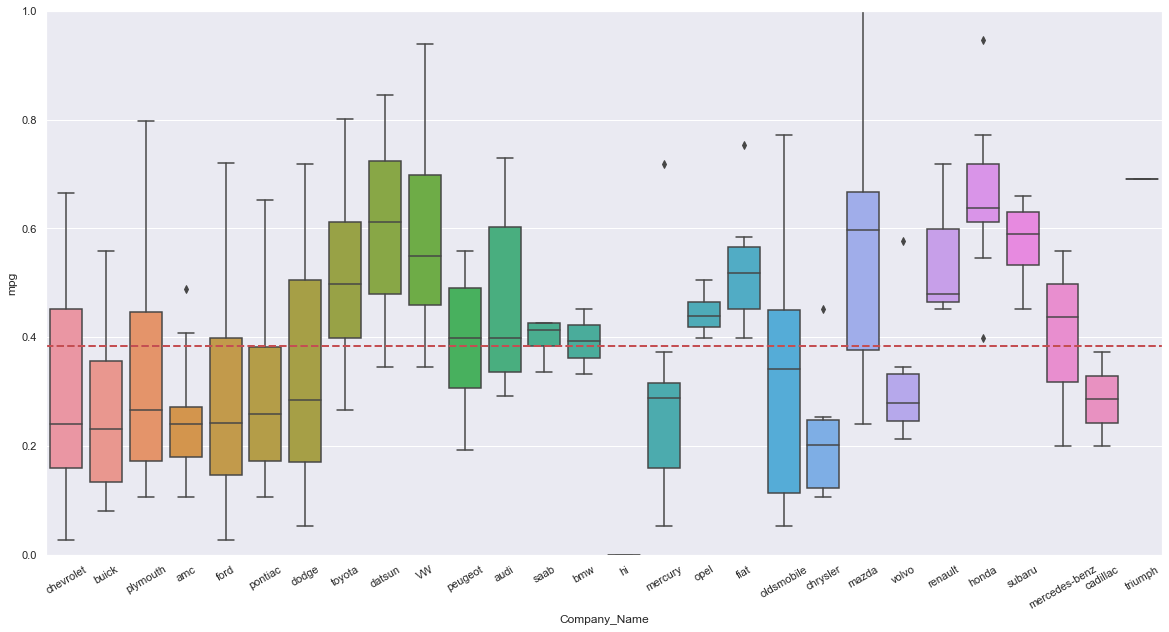

In [89]:
# since we have the unique names that are correct... \o/ , we can proceed with the analysis
var = 'Company_Name'
data_plt = pd.concat([data_scale['mpg'], data[var]],axis=1) # always check if both frames contian the same shape (same number of lines, in this case)

f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

In [91]:
## # Look at the extremes

var='mpg'

data[data[var]== data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
hi 1200d,9.0,8,304.0,193.0,4732,18.5,70,1,USA,hi


In [93]:
data[data[var]== data[var].max()]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
mazda glc,46.6,4,86.0,65.0,2110,17.9,80,3,Japan,mazda


In [94]:

var='displacement'


data[data[var]== data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
fiat 128,29.0,4,68.0,49.0,1867,19.5,73,2,Europe,fiat


In [95]:
data[data[var]== data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,USA,pontiac
buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,1,USA,buick
buick electra 225 custom,12.0,8,455.0,225.0,4951,11.0,73,1,USA,buick


In [96]:

var='horsepower'

data[data[var]== data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
volkswagen 1131 deluxe sedan,26.0,4,97.0,46.0,1835,20.5,70,2,Europe,VW
volkswagen super beetle,26.0,4,97.0,46.0,1950,21.0,73,2,Europe,VW


In [97]:
data[data[var]== data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
pontiac grand prix,16.0,8,400.0,230.0,4278,9.5,73,1,USA,pontiac


In [98]:
var='weight'

data[data[var]== data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
datsun 1200,35.0,4,72.0,69.0,1613,18.0,71,3,Japan,datsun


In [99]:
data[data[var]== data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
pontiac safari (sw),13.0,8,400.0,175.0,5140,12.0,71,1,USA,pontiac


In [100]:
var='acceleration'
data[data[var]== data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
plymouth 'cuda 340,14.0,8,340.0,160.0,3609,8.0,70,1,USA,plymouth


In [101]:
data[data[var]== data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
peugeot 504,27.2,4,141.0,71.0,3190,24.8,79,2,Europe,peugeot


In [ ]:
'''
Now that we have looked at the distribution of the data along discrete variables
and we saw some scatter-plots using the seaborn pairplot. 

Now let's try to find some logical causation for variations in mpg.
We will use the lmplot() function of seaborn with scatter set as true. 
This will help us in understanding the trends in these relations. 

We can later verify what we see with the correlation heat map to find
if the conclusions drawn are correct. 

We prefer lmplot() over regplot() for its ability to plot categorical data better. 

We will split the regressions for different origin countries.

'''

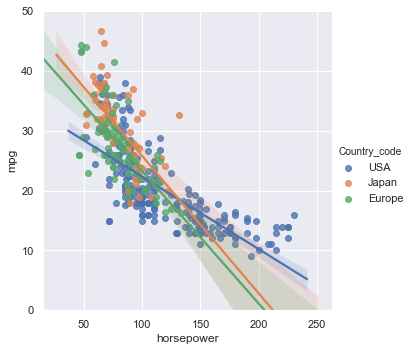

In [102]:
var = 'horsepower'

plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

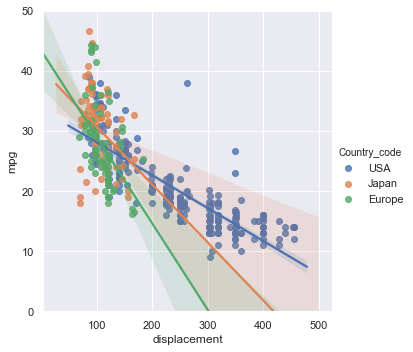

In [104]:
var = 'displacement'

plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

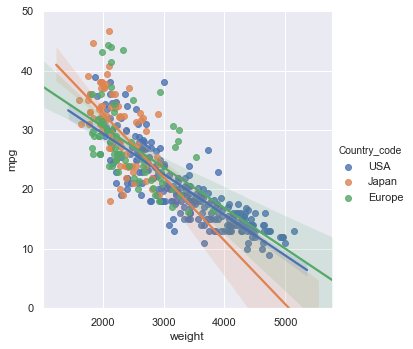

In [105]:
var = 'weight'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')

plot.set(ylim = (0,50))

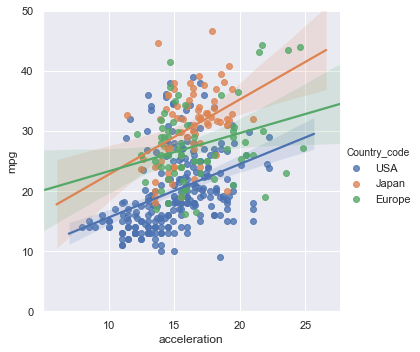

In [106]:
var = 'acceleration'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

In [109]:
# Let's transform Horsepower to Power-to-weight
# Obs.: Power-to-weight ratio (or specific power or power-to-mass ratio)
# is a calculation commonly applied to engines and mobile power sources 
# to enable the comparison of one unit or design to another

# Simply divide the power output of a vehicle by its weight. For example, if you have a car that weights 2000 pounds and has 250 hp, the PWR will be as follows: 250 / 2000 = 0.125 hp for every pound of car.
#1 hp = 745,7 W ou 0,7457 kW
# Probably the weight(mass) are in kg

data['Power_to_weight'] = ((data.horsepower*0.7457)/data.weight)

data.sort_values(by='Power_to_weight',ascending=False ).head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name,Power_to_weight
car name,,,,,,,,,,,
buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,1,USA,buick,0.054369
pontiac grand prix,16.0,8,400.0,230.0,4278,9.5,73,1,USA,pontiac,0.040091
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,USA,pontiac,0.037917
bmw 2002,26.0,4,121.0,113.0,2234,12.5,70,2,Europe,bmw,0.037719
chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,1,USA,chevrolet,0.037679


In [ ]:
# Next steps:

'''
Our journey so far:
So far, we have a looked at our data using various pandas methods and visualized it 
using seaborn package. 

We looked at: 
MPGs relation with discrete variables
    MPG distribution over given years of manufacturing
    MPG distribution by country of origin
    MPG distribution by number of cylinders

MPGs relation to other continuous variables:
    Pair-wise scatter plot of all variables in data.v ### Correlation
    We looked at the correlation heat map of all columns in our data.



Lets look at some regression models:
Now that we know what our data looks like, lets use some machine learning 
models to predict the value of MPG given the values of the factors. 

We will use python scikit learn to train test and tune various regression 
models on our data and compare the results. 

We shall use the following regression models:
    - Linear Regression
    - GBM Regression  (GradientBoostingRegressor)
    
'''

In [110]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name,Power_to_weight
car name,,,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,USA,chevrolet,0.027666
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,USA,buick,0.033317
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,USA,plymouth,0.032554
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,USA,amc,0.032582
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,USA,ford,0.030269


In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [144]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','origin','model year']

X = pd.DataFrame(data[factors].copy())

y = data['mpg'].copy()

In [145]:
X = StandardScaler().fit_transform(X)

In [146]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.33,random_state=324)

#check size of x and y
X_train.shape[0] == y_train.shape[0]

True

In [147]:

###########  ML model 1:
#type 
regressor = LinearRegression()

In [148]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [155]:
# model generation 

regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
# Output simulation with model
y_predicted = regressor.predict(X_test)

('y_true', 'y_pred', 'sample_weight', 'multioutput', 'y_type', 'output_errors')

In [162]:
# Check the RMSE:
'''
About RMSE:  Root Mean Square Error (RMSE) is the standard deviation of 
the residuals (prediction errors).
Residuals are a measure of how far from the regression line data points are;
RMSE is a measure of how spread out these residuals are.
In other words, it tells you how concentrated the data is around the line of best fit.
'''

mean_squared_error.__code__.co_varnames

('y_true', 'y_pred', 'sample_weight', 'multioutput', 'y_type', 'output_errors')

In [163]:
rmse = sqrt(mean_squared_error (y_true=y_test  ,  y_pred = y_predicted)  )
rmse

3.4867296149015625

In [123]:
########### ML model 2 generation

gb_regressor = GradientBoostingRegressor(n_estimators=4000)

gb_regressor.fit(X_train,y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=4000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [124]:
gb_regressor.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 4000,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [125]:
y_predicted_gbr = gb_regressor.predict(X_test)  # X_true

rmse_bgr = sqrt ( mean_squared_error (   y_true=y_test  ,  y_pred=y_predicted_gbr   ) ) 
rmse_bgr

2.6000412881439883

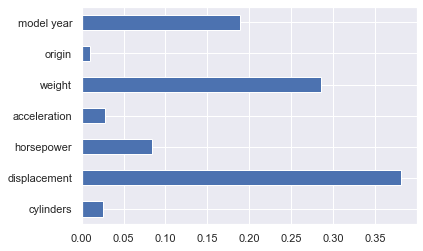

In [128]:
# Series is a one-dimensional labeled array capable of 
# holding data of any type (integer, string, float, python objects, etc.).
#The axis labels are collectively called index.
#pandas.Series( data, index, dtype, copy)

fi= pd.Series( gb_regressor.feature_importances_,  index =  factors)

fi.plot.barh()

In [167]:
gb_regressor.feature_importances_

array([0.02502105, 0.38053904, 0.08336678, 0.02768395, 0.28513461,
       0.00973682, 0.18851773])

In [184]:
# Ti print a tabular version
a = factors   # list
b = list(gb_regressor.feature_importances_)  # numpy. array
#res = "\n".join("{} {}".format(x, y) for x, y in zip(a, b))
#res

print("""factor:\t\t\t gb.regressor""")
for x, y in zip(a, b):
    print(x, "%4f"%y, sep='\t\t')

factor:			 gb.regressor
cylinders		0.025021
displacement		0.380539
horsepower		0.083367
acceleration		0.027684
weight		0.285135
origin		0.009737
model year		0.188518


In [166]:
'''
About GB future importances

Manually Plot Feature Importance
A trained XGBoost model automatically calculates feature importance on your predictive modeling problem.

These importance scores are available in the feature_importances_ member variable of the trained model. For example, they can be printed directly as follows:
'''


'''
Feature Importance in Gradient Boosting
A benefit of using gradient boosting is that after the boosted trees are constructed,
it is relatively straightforward to retrieve importance scores for each attribute.

Generally,-- importance -- provides a score that indicates how useful or valuable
each feature was in the construction of the boosted decision trees within the model. 

The more an attribute is used to make key decisions with decision trees, 
the higher its relative importance.

This importance is calculated explicitly for each attribute in the dataset, 
allowing attributes to be ranked and compared to each other.

Importance is calculated for a single decision tree 
by the amount that each attribute split point improves the performance measure,
weighted by the number of observations the node is responsible for.

The performance measure may be the purity (Gini index) used to select the split points
or another more specific error function.

The -- feature importances--  are then averaged across all of the the decision trees
within the model.

For more technical information on how feature importance is calculated 
in boosted decision trees, see Section 10.13.1 “Relative Importance of Predictor Variables” 
of the book The Elements of Statistical Learning: Data Mining, Inference, and Prediction, page 367.

Also, see Matthew Drury answer to the StackOverflow 
question “Relative variable importance for Boosting” 
where he provides a very detailed and practical answer.
'''

array([0.02502105, 0.38053904, 0.08336678, 0.02768395, 0.28513461,
       0.00973682, 0.18851773])

In [185]:
'''
Our initial models  well worked, but these metrics were performed on test set 
and cannot be used for tuning the model, 
as that will cause bleeding of test data into training data,

hence, we will use K-Fold to create Cross Validation sets
and use grid search to tune the model.
'''

'''
About PCA: 
check: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
PCA using Python (scikit-learn) - 
A more common way of speeding up a machine learning algorithm is by using
Principal Component Analysis (PCA).

If your learning algorithm is too slow because the input dimension is too high, 
then using PCA to speed it up can be a reasonable choice. 
This is probably the most common application of PCA. 
Another common application of PCA is for data visualization.

For the famous IRIS dataset example, you can use PCA to reduce original 4 dimensional data into 2 dimensions, 
 so that you can plot and hopefully understand the data better.
 
 
 Explained Variance
The explained variance tells you how much information (variance) can be attributed 
to each of the principal components. 

This is important as while you can convert 4 dimensional space to 2 dimensional space (IRIS example),
you lose some of the variance (information) when you do this. 

By using the attribute explained_variance_ratio_, it can be seen that 
the 1st. principal component contains 72.77% of the variance and 
the 2nd. principal component contains 23.03% of the variance.

Together, the two components contain 95.80% of the information.
Since this sum is >95%, we can keep using this 2 variables. 
'''

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(data[factors])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [186]:
pca.explained_variance_ratio_

array([0.99756151, 0.0020628 ])

In [192]:
# since their sum is>95%, we can go on.

pca1 = pca.components_[0]
pca2 = pca.components_[1]

print(pca1,pca2, sep='\n\n')

[ 1.79262233e-03  1.14341275e-01  3.89670355e-02 -1.35283460e-03
  9.92673415e-01 -5.51538021e-04 -1.33684138e-03]

[ 0.01332448  0.94577844  0.29824842 -0.03482584 -0.12075275 -0.00324298
 -0.02385168]


[ 536.44492922  730.34140206  470.9815846   466.40143367  481.66788465
 1383.91467684 1400.53659072 1357.0493707  1471.32422677  891.74301353]
[ 50.83312832  79.13543921  75.4476722   62.53420646  55.78036021
  85.49859137 114.1695576  104.52644573 107.99830713 105.56908317]


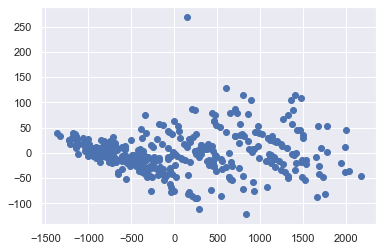

In [196]:

transformed_data = pca.transform(data[factors])

pc1 = transformed_data[:,0]
pc2 = transformed_data[:,1]
plt.scatter(pc1,pc2)

print (transformed_data[:10,0])
print (transformed_data[:10,1])

In [203]:
c = pca.inverse_transform ( transformed_data [(transformed_data[:,0]>0 )
                                             & (transformed_data[:,1]>250)]   )
print(factors)
c


['cylinders', 'displacement', 'horsepower', 'acceleration', 'weight', 'origin', 'model year']


array([[9.32016159e+00, 4.65727261e+02, 1.90441442e+02, 5.95699243e+00,
        3.08611199e+03, 6.23550659e-01, 6.93571097e+01]])

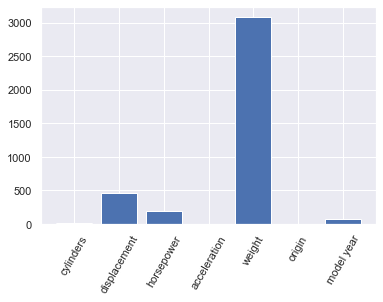

In [211]:
chart=plt.bar(factors, c[0])
#chart.set_xticklabels(rotation=45)
plt.xticks(rotation=60)
plt.show()

In [143]:
data [   (data['model year'] == 70)   &   (data.displacement>400)   ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name,Power_to_weight
car name,,,,,,,,,,,
ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,1,USA,ford,0.034013
chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,1,USA,chevrolet,0.037679
plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,1,USA,plymouth,0.037181
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,USA,pontiac,0.037917
buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,1,USA,buick,0.054369


In [214]:
'''
The exceptionally far away point seems to be the Buick estate wagon.
This seems logical as the weight data given in the data set seems to be incorrect. 

The weight for the vehicle is given to be 3086 lbs, however, 
on research it can be found that the car weight is 4727-4775 lbs. 
These values are based on internet search.

- Now we use K-fold to create a new K-fold object called 'cv_sets' 
that contains index values for training and cross validation 
and use these sets in GridSearchCV to tune our model 
so that it does not over fit or under fit the data

- We will also define a dictionary called 'params' with the hyper-parameters we want to tune.

 - Lastly we define 'grid' which is a GridSearchCV object 
which we will provide the parameters to tune
and the K folds of data created by using the Kfold in sklearn.model_selection

'''

cv_sets = KFold (n_splits=10, shuffle= True, random_state=100)

params = {'n_estimators' : list(range(40,61)),
         'max_depth' : list(range(1,10)),
         'learning_rate' : [0.1,0.2,0.3] }

grid = GridSearchCV ( gb_regressor, 
                     params ,
                     cv=cv_sets,
                     n_jobs=4)

grid = grid.fit(X_train, y_train)

grid.best_estimator_

c:\users\dalciana\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.3, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=44,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [218]:
gb_regressor_t = grid.best_estimator_

gb_regressor_t.fit(X_train,y_train)


y_predicted_gbr_t = gb_regressor_t.predict (X_test)

rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr_t))
rmse

2.7027928024367665

In [219]:
data.duplicated().any()

False

# END

In [ ]:
# IF Pandas replacement method is not working.

#Brutal force method

'''
for i in range(data.shape[0]):  # nbr of  lines  of the dataset
    data['Company_Name'][i]=data.index[i]
    
#check:
data['Company_Name'][140:150]

for i in range(data.shape[0]):  # nbr of  lines  of the dataset
    
    if 'volkswagen'in data['Company_Name'][i]:
        data['Company_Name'][i]='VW'
    #elif 'chevroelt' or 'chevy' in data['Company_Name'][i]:
    elif 'chevrolet' in data['Company_Name'][i]:
        data['Company_Name'][i]='Chevrolet'
    elif 'chevroelt' in data['Company_Name'][i]:
        data['Company_Name'][i]='Chevrolet'
    elif 'chevy' in data['Company_Name'][i]:
        data['Company_Name'][i]='Chevrolet'
    elif 'maxda' in data['Company_Name'][i]:
        data['Company_Name'][i]='Mazda' 
    elif 'mazda' in data['Company_Name'][i]:
        data['Company_Name'][i]='Mazda'     
    elif 'mercedes-benz' in data['Company_Name'][i]:
        data['Company_Name'][i]='Mercedes-Benz'
    elif 'ford' in data['Company_Name'][i]:
        data['Company_Name'][i]='Ford'        
    elif 'datsun' in data['Company_Name'][i]:
        data['Company_Name'][i]='Datsun'       
    elif 'amc' in data['Company_Name'][i]:
        data['Company_Name'][i]='Amc'
    elif 'dodge' in data['Company_Name'][i]:
        data['Company_Name'][i]='Dodge'  
    elif 'plymouth' in data['Company_Name'][i]:
        data['Company_Name'][i]='Plymouth'  
    elif 'toyota' in data['Company_Name'][i]:
        data['Company_Name'][i]='Toyota'  
    elif 'honda' in data['Company_Name'][i]:
        data['Company_Name'][i]='Honda'  
    elif 'buick' in data['Company_Name'][i]:
        data['Company_Name'][i]='Buick'
    elif 'saab' in data['Company_Name'][i]:
        data['Company_Name'][i]='Saab'
    elif 'fiat' in data['Company_Name'][i]:
        data['Company_Name'][i]='Fiat'
    elif 'opel' in data['Company_Name'][i]:
        data['Company_Name'][i]='Opel'
    elif 'pontiac' in data['Company_Name'][i]:
        data['Company_Name'][i]='Pontiac'
    elif 'bmw' in data['Company_Name'][i]:
        data['Company_Name'][i]='BMW'
    elif 'peugeot' in data['Company_Name'][i]:
        data['Company_Name'][i]='Peugeot'
    elif 'hi' in data['Company_Name'][i]:
        data['Company_Name'][i]='Hi'
    elif 'crysler' in data['Company_Name'][i]:
        data['Company_Name'][i]='Crysler'
        
       
#Check:
data['Company_Name'].unique()
'''